[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/deep-learning/mlp/xor_mlp.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# MLP for the XOR problem

In this notebook, we create a Multilayer Perceptron (MLP) to solve the XOR problem. 

In [15]:
# make sure the required packages are installed
%pip install pandas numpy seaborn matplotlib scikit-learn keras tensorflow --quiet
# if running in colab, install the required packages and copy the necessary files
directory='data-science-course/deep-learning/mlp'
if get_ipython().__class__.__module__.startswith('google.colab'):
    !git clone https://github.com/francisco-ortin/data-science-course.git  2>/dev/null
    !cp --update {directory}/*.py .
    !mkdir -p img data
    !cp {directory}/img/* img/.

from keras.src.layers import Dense
from keras.src.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
import numpy as np

from utils import show_history

Note: you may need to restart the kernel to use updated packages.


## Dataset

We define the data for the XOR problem.

In [16]:
# Two independent variables of the XOR problem
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
# Dependent variable (XOR value)
y = np.array([[0], [1], [1], [0]])

## Multi-layer Perceptron

We create a multi-layer perceptron with one hidden layer and one output layer (the input "layer" has no parameters).

In [17]:
model = Sequential()
# One hidden layer with 4 neurons (4 x (2+1) = 12 params)
model.add(Dense(4, input_dim=2, activation='sigmoid'))
# Output layer (1 neuron) (1 x (4+1) = 5 params)
model.add(Dense(1, activation='sigmoid'))  # We do not need to include the input_dim (is inferred)
model.summary()  # params=17

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 12        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model training

We train the model using the Adam optimizer and the binary cross-entropy loss function.

Epoch 1/200
1/1 [==============================] - 0s 462ms/step - loss: 0.7011 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 0.7029 - accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6911 - accuracy: 0.7500
Epoch 5/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6863 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6822 - accuracy: 0.2500
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6797 - accuracy: 0.7500
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6779 - accuracy: 0.7500
Epoch 11/200
1/1 [========

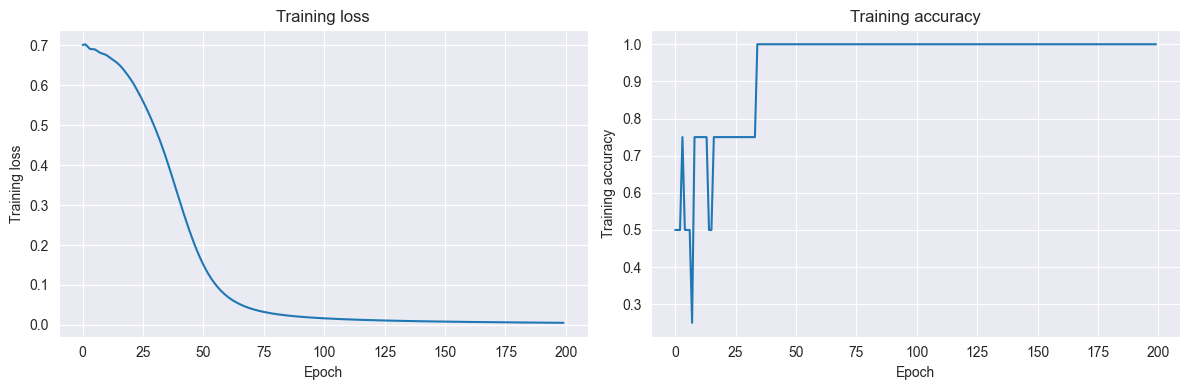

In [18]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])
history = model.fit(X, y, epochs=200)
show_history(history, loss_label='Training loss', accuracy_label='Training accuracy')

## Prediction and evaluation

Let's see how the model predicts the XOR values. Then, we will evaluate the model.

In [19]:
prediction_probabilities = model.predict(X, verbose=0)
prediction = np.vectorize(lambda x: 1 if x > 0.5 else 0)(prediction_probabilities)

print(f"Actual values:\n{y}")
print(f"Predicted values:\n{prediction}")
print(f"Accuracy: {accuracy_score(y, prediction):.4f}.")
print(f"F1-score: {f1_score(y, prediction):.4f}.")

Actual values:
[[0]
 [1]
 [1]
 [0]]
Predicted values:
[[0]
 [1]
 [1]
 [0]]
Accuracy: 1.0000.
F1-score: 1.0000.


## ✨ Questions ✨ 

1. What happens if you decrease the number of neurons of the hidden layer to 2? Why?
2. What happens if you decrease the number of neurons of the hidden layer to 1? Why?

### Answers

*Write your answers here.*

